# Surfaces

We get our introduction to surfaces in Kreyszig Ch. 3. Specifically, $\S3.24$ Before, we've defined surfaces like

$$z = f(x,y) $$

and we've been good at visualizing them. Here, we run into the definition of a surface in terms of a mapping that sends

$$ (u_1,u_2) \to (x(u_1,u_2), y(u_1,u_2), z(u_1,u_2)) $$

and warns us that something like

$$ (u_1+u_2, (u_1+u_2)^2, (u_1+u_2)^3) $$

is problematic because, since it can be parameterized by a single variable, it's actually a curve rather than a surface. We also run into the Jacobian and some linear algebra. Our goal right now is to work with concrete curves and surfaces in $\mathbb{R}^3$ So, let's figure out how to visualize these sorts of mappings. First, some gunk to set up our python environment. For the experts, note that we could use "%matplotlib notebook" but it seems really slow

In [1]:
import numpy as np, scipy as sp, pandas as pd, seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# for newer versions, the next line is not needed, and actually breaks things.
#%matplotlib inline

import itertools
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    #http://stackoverflow.com/questions/22867620/putting-arrowheads-on-vectors-in-matplotlibs-3d-plot
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

Now, let's just try one of these out. One of the examples we want to look at in the book is 

$$ (u_1+u_2, \sin(u_1), \cos(u_1+u_2)) $$

so let's make a grid of points where $u_1$ and $u_2$ vary from -2 to 2, then plot the corresponding surface. We'll plot $(u_1, u_2, 0)$ in grey and the surface in blue.

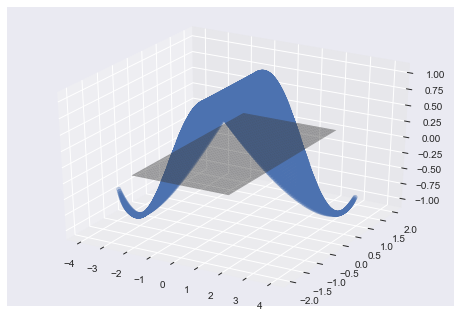

In [32]:
u1 = np.linspace(-2,2,100)
u2 = np.linspace(-2,2,100)
U1, U2 = np.meshgrid(u1, u2)
X = U1 + U2
Y = np.sin(U1)
Z = np.cos(U1+U2)

fig = plt.figure()
ax = fig.gca(projection='3d')
#surf = ax.plot_surface(X+Y, np.sin(X), np.cos(X+Y))
surf2 = ax.plot_surface(U1, U2, 0, color='grey', alpha=0.5)
surf = ax.scatter(X, Y, Z)
plt.show()

You can play around with the above, using more or fewer points, etc. You can clearly see that the surface extends vertically and horizontally beyond the patch from $u_1$ and $u_2$, although it's kind of cheating to plot them both at the same time. So let's wrap that up in a function and try it with different maps.

To make it cuter, we'll draw red arrows from some specific points to see which points get mapped where. And we'll plot a surface not a collection of points, by default, because it's way faster.

In [9]:
def plot_surface(f,plotmode='surface',urange=2*np.pi):
    u1 = np.linspace(-urange,urange,100)
    u2 = np.linspace(-urange,urange,100)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    U1, U2 = np.meshgrid(u1, u2)
    X,Y,Z = f(U1,U2)
    surf2 = ax.plot_surface(U1, U2, 0, color='grey', alpha=0.5)
    if plotmode == 'surface':
        surf = ax.plot_surface(X,Y,Z)
    elif plotmode == 'points':
        surf = ax.scatter(X,Y,Z)
    else:
        raise Exception('Unknown plot mode {p}'.format(p=plotmode))
    for (w1,w2) in itertools.permutations([-urange,-urange/2,0,urange/2,urange],2):
        x,y,z = f(w1,w2)
        a = Arrow3D([w1,x],[w2,y],[0,z], mutation_scale=20, 
                    lw=1, arrowstyle="-|>", color="r",
                   alpha=0.7,zorder=-1)
        ax.add_artist(a)
    plt.show()

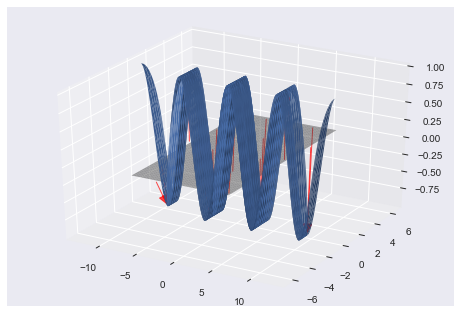

In [10]:
def f(X,Y):
    return X+Y, np.sin(X), np.cos(X+Y)
plot_surface(f)
#plt.show()

### Changing `urange` changes how big the $(u1,u2)$ patch is

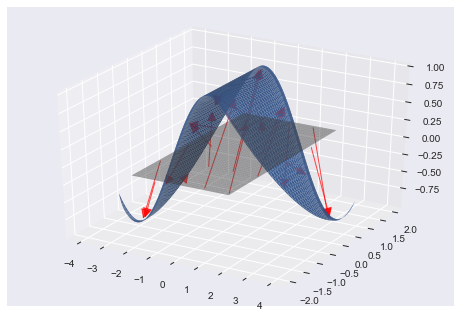

In [11]:
plot_surface(f,urange=2)

/Users/mglerner/anaconda3/envs/nodev_up/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app
/Users/mglerner/anaconda3/envs/nodev_up/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/Users/mglerner/anaconda3/envs/nodev_up/lib/python3.6/site-packages/mpl_toolkits/mplot3d/proj3d.py:160: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


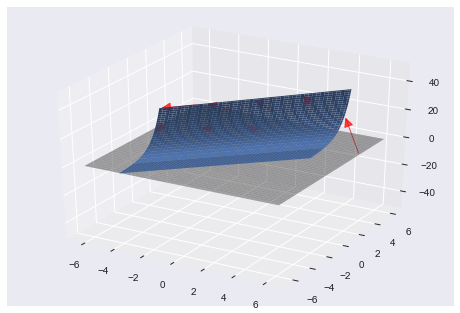

In [12]:
def f(X,Y):
    return X,np.log(Y),3*X+5*Y
plot_surface(f)

# The curve

so, what does the curve look like?

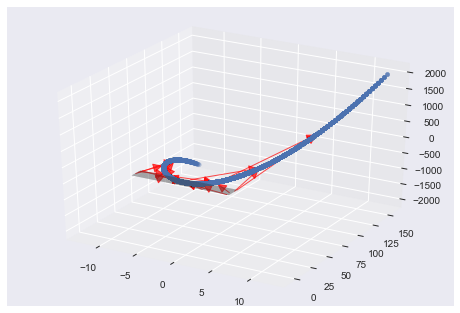

In [21]:
def f(X,Y):
    return X+Y, (X+Y)**2, (X+Y)**3
plot_surface(f, plotmode='points')

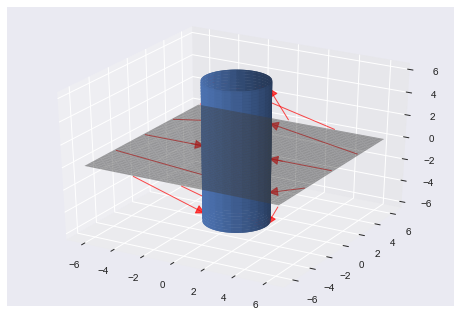

In [14]:
def f(X,Y):
    return 2*np.cos(X),2*np.sin(X),Y
plot_surface(f)

# An interactive one

Here, you get a slider so you can watch the green surface interpolate linearly between the grey patch $(u_1,u_2)$ and the surface defined by $(x,y,z)$. This is worth running interactively, and playing with. You also get some sliders to change the view. Play!

In [15]:
from ipywidgets import interact, interactive, fixed

In [16]:
def plot_surface_interpolate(f=f,plotmode='surface',urange=2*np.pi,interp=0.1,elev=None,azim=None):
    u1 = np.linspace(-urange,urange,100)
    u2 = np.linspace(-urange,urange,100)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    U1, U2 = np.meshgrid(u1, u2)
    X,Y,Z = f(U1,U2)
    U3 = np.zeros_like(Z)
    A = (1-interp)*U1 + interp*X
    B = (1-interp)*U2 + interp*Y
    C = (1-interp)*U3 + interp*Z
    surf2 = ax.plot_surface(U1, U2, 0, color='grey', alpha=0.5)
    if plotmode == 'surface':
        surf = ax.plot_surface(X,Y,Z,alpha=0.9,color='blue')
        surf3 = ax.plot_surface(A,B,C,color='green',zorder=-2,alpha=0.9)
    elif plotmode == 'points':
        surf = ax.scatter(X,Y,Z,alpha=0.9,color='blue')
        surf3 = ax.scatter(A,B,C,color='green',zorder=-2,alpha=0.9)
    else:
        raise Exception('Unknown plot mode {p}'.format(p=plotmode))
    
    for (w1,w2) in itertools.permutations([-urange,-urange/2,0,urange/2,urange],2):
        x,y,z = f(w1,w2)
        a = Arrow3D([w1,x],[w2,y],[0,z], mutation_scale=20, 
                    lw=1, arrowstyle="-|>", color="r",
                   alpha=0.7,zorder=-1)
        ax.add_artist(a)
    ax.view_init(elev=elev,azim=azim)
    plt.show()

In [17]:
# You can change this to %matplotlib notebook if you want. It looks better, but is much slower for me.
#%matplotlib inline

## Now play with the `interp` slider, to see how you'd interpolate linearly from $(u_1, u_2)$ to $(x,y,z)$

### If you're running this locally, you want the interp step to be 0.01, and the degree steps to be 1.
### For the notebooks viewable online, you want something coarser to keep the filesize down.

In [18]:
interp_step = 0.1
degree_step=15

In [19]:
def plot_this(interp=0.1,azim=30,elev=30,plotmode='surface'):
    def f(X,Y):
        return 2*np.cos(X),2*np.sin(X),Y
    plot_surface_interpolate(f,interp=interp,azim=azim,elev=elev,plotmode=plotmode)
interact(plot_this,interp=(0,1,interp_step),azim=(0,360,degree_step),elev=(0,360,degree_step),plotmode=['points','surface'])

<function __main__.plot_this>

## This next one was, for us, particularly compelling. Seeing how you map a 2D surface into a curve was enlightening

In [20]:
def plot_this(interp=0.1,azim=30,elev=30,plotmode='surface'):
    def f(X,Y):
        return X+Y, (X+Y)**2, (X+Y)**3
    plot_surface_interpolate(f,interp=interp,azim=azim,elev=elev,plotmode=plotmode,urange=1)
interact(plot_this,interp=(0,1,interp_step),azim=(0,360,degree_step),elev=(0,360,degree_step),plotmode=['points','surface'])

<function __main__.plot_this>

In [22]:
def plot_this(interp=0.1,azim=113,elev=30,plotmode='surface'):
    def f(X,Y):
        return X+Y, np.sin(X), np.cos(X+Y)
    plot_surface_interpolate(f,interp=interp,azim=azim,elev=elev,plotmode=plotmode,urange=2)
interact(plot_this,interp=(0,1,interp_step),azim=(0,360,degree_step),elev=(0,360,degree_step),plotmode=['points','surface'])

<function __main__.plot_this>

# Example 1 (two representations of the plane)

rectangular and polar. Note what happens when you drag the `interp` slider on the polar representation.

In [23]:
def plot_this(interp=0.1,azim=113,elev=30,plotmode='surface'):
    def f(U1,U2):
        return U1, U2, 0
    plot_surface_interpolate(f,interp=interp,azim=azim,elev=elev,plotmode=plotmode,urange=2)
interact(plot_this,interp=(0,1,0.01),azim=(0,360,1),elev=(0,360,1),plotmode=['points','surface'])

<function __main__.plot_this>

### This one trips the class up, because you want to say "nothing is going to change" ... but it does ...

In [24]:
def plot_this(interp=0.1,azim=113,elev=30,plotmode='surface'):
    def f(U1,U2):
        return U1*np.cos(U2), U1*np.sin(U2), 0
    plot_surface_interpolate(f,interp=interp,azim=azim,elev=elev,plotmode=plotmode,urange=2)
interact(plot_this,interp=(0,1,0.01),azim=(0,360,1),elev=(0,360,1),plotmode=['points','surface'])

<function __main__.plot_this>

## Example 3 (sphere of radius r) (transparency is kind of problematic here)

In [25]:
def plot_this(interp=0.1,azim=113,elev=30,plotmode='surface',r=1):
    def f(U1,U2,r=r):
        return r*np.cos(U2)*np.cos(U1), r*np.cos(U2)*np.sin(U1), r*np.sin(U2)
    plot_surface_interpolate(f,interp=interp,azim=azim,elev=elev,plotmode=plotmode,urange=2*np.pi)
interact(plot_this,interp=(0,1,0.01),azim=(0,360,1),elev=(0,360,1),plotmode=['points','surface'],
        r=(0,10,0.2))

<function __main__.plot_this>

## Example 3

In [26]:
def plot_this(interp=0.1,azim=113,elev=30,plotmode='surface',a=1):
    def f(U1,U2,a=a):
        return U1*np.cos(U2), U1*np.sin(U2), a*U1
    plot_surface_interpolate(f,interp=interp,azim=azim,elev=elev,plotmode=plotmode,urange=2)
interact(plot_this,interp=(0,1,0.01),azim=(0,360,1),elev=(0,360,1),plotmode=['points','surface'],
        a=(0,10,0.2))

<function __main__.plot_this>

## Problem 25.1

In [27]:
def plot_this(interp=0.1,azim=113,elev=30,plotmode='surface'):
    def f(U1,U2):
        return 0, U1, U2
    plot_surface_interpolate(f,interp=interp,azim=azim,elev=elev,plotmode=plotmode,urange=2)
interact(plot_this,interp=(0,1,0.01),azim=(0,360,1),elev=(0,360,1),plotmode=['points','surface'])

<function __main__.plot_this>

In [28]:
def plot_this(interp=0.1,azim=53,elev=30,plotmode='surface'):
    def f(U1,U2):
        return U1+U2, U1+U2, U1
    plot_surface_interpolate(f,interp=interp,azim=azim,elev=elev,plotmode=plotmode,urange=2)
interact(plot_this,interp=(0,1,0.01),azim=(0,360,1),elev=(0,360,1),plotmode=['points','surface'])

<function __main__.plot_this>

In [29]:
def plot_this(interp=0.1,azim=113,elev=30,plotmode='surface'):
    def f(U1,U2):
        return np.cos(U1), np.sin(U1), U2
    plot_surface_interpolate(f,interp=interp,azim=azim,elev=elev,plotmode=plotmode,urange=2)
interact(plot_this,interp=(0,1,0.01),azim=(0,360,1),elev=(0,360,1),plotmode=['points','surface'])

<function __main__.plot_this>

In [30]:
def plot_this(interp=0.1,azim=113,elev=30,plotmode='surface'):
    def s(U1,U2):
        return U1+U2
    def h1(s):
        return s
    def h2(s):
        return s**2
    def h3(s):
        return s
    
    def f(U1,U2):
        S = s(U1,U2)
        return h1(S), h2(S), h3(S)
    def f(U1,U2):
        return h1(U1), h2(U1), h3(U1) + U2
    plot_surface_interpolate(f,interp=interp,azim=azim,elev=elev,plotmode=plotmode,urange=2)
interact(plot_this,interp=(0,1,0.01),azim=(0,360,1),elev=(0,360,1),plotmode=['points','surface'])

<function __main__.plot_this>

## Monge gauge

Now we should do a specific example in the Monge gauge

In [31]:
def plot_this(interp=0.1,azim=113,elev=30,plotmode='surface'):
    def f(U1,U2):
        X = U1
        Y = U2
        def h(x,y):
            return 4+ np.cos(x) + np.sin(y)
        return X,Y,h(X,Y)
    plot_surface_interpolate(f,interp=interp,azim=azim,elev=elev,plotmode=plotmode,urange=2)
interact(plot_this,interp=(0,1,0.01),azim=(0,360,1),elev=(0,360,1),plotmode=['points','surface'])

<function __main__.plot_this>